**Comparing the performance of two classifiers (Logistic regression and Decision Trees) using
Dietterich’s 5x2cv paired t-test** 

In [15]:
from mlxtend.evaluate import paired_ttest_5x2cv
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

categories = ['alt.atheism', 'talk.religion.misc','comp.graphics', 'sci.space']
#remove = ('headers', 'footers', 'quotes') uncomment and use this to remove metadata, which will be a realistic f1 score, less overfitting 
data_train = datasets.fetch_20newsgroups(subset='train', categories=categories, shuffle=True)
y_ = data_train.target

vectorizer = CountVectorizer(analyzer='word', strip_accents=ascii,min_df=0.001, max_df=0.2, stop_words='english')
X_ = vectorizer.fit_transform(data_train.data)

clf1 = LogisticRegression(random_state=1)
clf2 = DecisionTreeClassifier(random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=1)

score1 = clf1.fit(X_train, y_train).score(X_test, y_test)
score2 = clf2.fit(X_train, y_train).score(X_test, y_test)

print("CLF1 : %.2f%% " %(score1*100))
print("CLF2 : %.2f%% " %(score2*100))

CLF1 : 93.15% 
CLF2 : 79.32% 


In [16]:
t, p = paired_ttest_5x2cv(estimator1=clf1,estimator2=clf2, X=X_, y=y_, random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 6.998
p value: 0.001


**Comparing two classifiers (Logistic regression and Naive Bayes) using learning curves.**

[[0.96202532 0.93670886 0.96202532 0.96202532 0.96202532]
 [0.96855346 0.96855346 0.95597484 0.95597484 0.95597484]
 [0.97058824 0.97058824 0.97058824 0.96638655 0.96638655]
 [0.97169811 0.97169811 0.97169811 0.97484277 0.96540881]
 [0.97236181 0.96984925 0.96984925 0.98241206 0.97236181]]
[[0.85964912 0.96491228 0.92105263 0.85087719 0.82300885]
 [0.9122807  0.96491228 0.99122807 0.96491228 0.99115044]
 [0.93859649 0.97368421 0.98245614 0.96491228 0.99115044]
 [0.95614035 0.96491228 0.98245614 0.96491228 0.98230088]
 [0.94736842 0.98245614 0.97368421 0.96491228 0.98230088]]
--------------------------------------


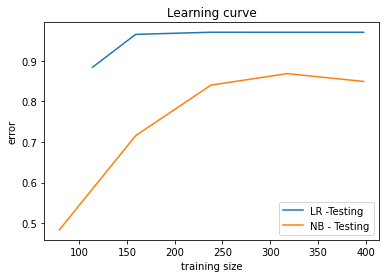

[[0.7721519  0.82278481 0.75949367 0.75949367 0.75949367]
 [0.71698113 0.79245283 0.83647799 0.83647799 0.83647799]
 [0.88235294 0.86134454 0.84033613 0.84453782 0.84453782]
 [0.86477987 0.86792453 0.8490566  0.83647799 0.87735849]
 [0.85175879 0.84673367 0.83417085 0.83417085 0.85427136]]
[[0.46491228 0.70175439 0.40350877 0.40350877 0.44247788]
 [0.63157895 0.69298246 0.73684211 0.73684211 0.77876106]
 [0.86842105 0.84210526 0.90350877 0.79824561 0.78761062]
 [0.79824561 0.83333333 0.9122807  0.90350877 0.89380531]
 [0.77192982 0.79824561 0.86842105 0.88596491 0.92035398]]
--------------------------------------


In [75]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import minmax_scale,MinMaxScaler, scale
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import matplotlib.pyplot as plt


cancer = load_breast_cancer()
X1_ = cancer.data
Y1_ = cancer.target

# custom_partitions = [np.floor(0.2*Y_.size), np.floor(0.4*Y_.size), np.floor(0.6*Y_.size), np.floor(0.8*Y_.size),np.floor(1*Y_.size)]
# custom_partitions = np.array(minmax_scale(custom_partitions,feature_range=(0,1)), dtype=int)

mmc = MaxAbsScaler()
x1_scaled = mmc.fit_transform(X_)

partitions ,train_score ,test_score = learning_curve(LogisticRegression(), X1_scaled, Y1_,n_jobs=-1,cv=5, scoring='neg_mean_squared_error', train_sizes=[79, 159, 238, 318,398])
#plt.plot(partitions , np.mean(train_score, axis = 1) , label = 'LR - Training' )
plt.plot(train_sizes , np.mean(test_score, axis = 1), label = 'LR -Testing')

print(train_score)
print(test_score)
print("--------------------------------------")

partitions1, train_score1, test_score1 = learning_curve(MultinomialNB(),X1_scaled, Y1_,n_jobs=-1,cv=5, scoring='neg_mean_squared_error',train_sizes = [79, 159, 238, 318,398])
#plt.plot(partitions1 , np.mean(train_score1, axis = 1) , label = 'NB - Training' )
plt.plot(partitions1 , np.mean(test_score1, axis = 1), label = 'NB - Testing')
plt.title('Learning curve')
plt.xlabel('training size')
plt.ylabel('error')
plt.legend()
plt.show()
print(train_score1)
print(test_score1)
print("--------------------------------------")